## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.
# this would be helpful only if we used it, like using warnings.filterwarnings('ignore') to supress warning messages.
import warnings

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# missingo, plotly, scipi

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [3]:
#read the data set of "bank telemarketing campaign" in inp0(inp0 will be a dataframe)
# we either have to use raw strings(r), or double backslashes or forward slashes inplace of backslases to prevent unicode 
# excape error
# either specify the datatypes of the dataset or use low_memory = False while importing dataset to prevent this warning
# this warning just indicates that the dataset has mixed datatype

bank = pd.read_csv(r"C:\Users\This pc\Downloads\Bank+Dataset\Bank Dataset\bank_marketing_updated_v1.csv")

C:\Users\This pc\AppData\Local\Temp\ipykernel_8684\2424329603.py:7: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  bank = pd.read_csv(r"C:\Users\This pc\Downloads\Bank+Dataset\Bank Dataset\bank_marketing_updated_v1.csv")


In [4]:
#Print the head of the data frame.
bank.head()
# bank.shape

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.
# use skiprows, skips linewise row by default
# use a list of rows and passs it to skiprows to skip specific rows
bank = pd.read_csv(r"C:\Users\This pc\Downloads\Bank+Dataset\Bank Dataset\bank_marketing_updated_v1.csv", skiprows=2)

In [6]:
#print the head of the data frame.
# it takes the first row as header by default
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
#print the information of variables to check their data types.
bank.info()
#to only check datatype,use type(bank) but it will not display the datatype of every column,it would display that it is a dframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [8]:
#convert the age variable data type from float to integer.
# it will show 'IntCastingNaNError' if you directly try to convert as there are NaN values present in the column
# so either fill NaN vlaues with default value, drop rows with NaN values or convert the column to a nullable integer type
# 1) default vlaue replacement : 
bank['age'] = bank['age'].fillna(0).astype('int64')
# 2) dropping rows bank = bank.dropna(subset = ['age'])     bank['age'] = bank['age'].astype(int)
# 3) converting to nullable integer bank['age'] = pd.to_numeric(bank['age'], errors='coerce').astype(int)
# this third method also converts values to 0
# np.nan can also be used
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   salary      45211 non-null  int64 
 3   balance     45211 non-null  int64 
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  int64 
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  int64 
 15  pdays       45211 non-null  int64 
 16  previous    45211 non-null  int64 
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [9]:
#print the average age of customers.
bank['age'].mean()

40.917542191059695

#### Dropping customer id column. 

In [10]:
#drop the customer id as it is of no use.
# axis 1 specifies its a column,inplace true makes sure changes are done in the original df(new df created if false; by default)
bank.drop('customer id', axis =1, inplace = True)

KeyError: "['customer id'] not found in axis"

#### Dividing "jobedu" column into job and education categories. 

In [11]:
#Extract job in newly created 'job' column from "jobedu" column.
# we use double bracket indexing to create two new columns in the original DataFrame while performing the split operation.
# The expand=True parameter splits the values into separate columns. If you set expand=False in the .str.split() method, 
# the result will be a Pandas Series of lists, where each element in the Series will be a list containing the split values 
# from the original column.
bank[['job', 'eductation']] =  bank['jobedu'].str.split(',' , expand=True)
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,eductation
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [12]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= 

SyntaxError: invalid syntax (42139453.py, line 2)

In [13]:
#drop the "jobedu" column from the dataframe.
bank.drop('jobedu' , axis=1, inplace=True)
bank.head(2)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,eductation
0,1,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [14]:
#count the missing values in age column.
age_missing = (bank['age'] == 0).sum()
print(age_missing)

20


In [15]:
#print the shape of dataframe bank
print(bank.shape)

(45211, 20)


In [16]:
#calculate the percentage of missing values in age column.
print((bank['age'] == 0).mean()*100)

0.0442370219636814


<!-- Drop the records with age missing.  -->

In [17]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
mask = bank['age'] != 0
bank1 = bank.loc[mask].copy()
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45191 non-null  int64 
 1   age         45191 non-null  int64 
 2   salary      45191 non-null  int64 
 3   balance     45191 non-null  int64 
 4   marital     45191 non-null  object
 5   targeted    45191 non-null  object
 6   default     45191 non-null  object
 7   housing     45191 non-null  object
 8   loan        45191 non-null  object
 9   contact     45191 non-null  object
 10  day         45191 non-null  int64 
 11  month       45141 non-null  object
 12  duration    45191 non-null  object
 13  campaign    45191 non-null  int64 
 14  pdays       45191 non-null  int64 
 15  previous    45191 non-null  int64 
 16  poutcome    45191 non-null  object
 17  response    45161 non-null  object
 18  job         45191 non-null  object
 19  eductation  45191 non-null  object
dtypes: int

#### handling missing values in month column

In [18]:
#count the missing values in month column in inp1.
month_missing = bank1['month'].isnull().sum()
print(month_missing)

50


In [19]:
#print the percentage of each month in the data frame inp1.
mc = bank1['month'].value_counts()
mp = (mc/len(bank1)*100)
print(mp)

may, 2017    30.404284
jul, 2017    15.235334
aug, 2017    13.796995
jun, 2017    11.801022
nov, 2017     8.778297
apr, 2017     6.483592
feb, 2017     5.855148
jan, 2017     3.102388
oct, 2017     1.630856
sep, 2017     1.274590
mar, 2017     1.053307
dec, 2017     0.473546
Name: month, dtype: float64


In [20]:
#find the mode of month in inp1
mm = bank1['month'].mode()
print(mm)

0    may, 2017
Name: month, dtype: object


In [21]:
# fill the missing values with mode value of month in inp1.
bank1['month'] = bank1['month'].fillna(bank1['month'].mode())

In [22]:
#let's see the null values in the month column.
bank1['month'].isnull().sum()

50

#### handling missing values in response column 

In [23]:
#count the missing values in response column in inp1.
res_missing = bank1['response'].isnull().sum()
print(res_missing)

30


In [24]:
#calculate the percentage of missing values in response column. 
print(30/45191*100)

0.06638489964816004


Target variable is better of not imputed.
- Drop the records with missing values.

In [25]:
#drop the records with response missings in inp1.
bank1.dropna(subset = ['response'], inplace = True)
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45161 non-null  int64 
 1   age         45161 non-null  int64 
 2   salary      45161 non-null  int64 
 3   balance     45161 non-null  int64 
 4   marital     45161 non-null  object
 5   targeted    45161 non-null  object
 6   default     45161 non-null  object
 7   housing     45161 non-null  object
 8   loan        45161 non-null  object
 9   contact     45161 non-null  object
 10  day         45161 non-null  int64 
 11  month       45111 non-null  object
 12  duration    45161 non-null  object
 13  campaign    45161 non-null  int64 
 14  pdays       45161 non-null  int64 
 15  previous    45161 non-null  int64 
 16  poutcome    45161 non-null  object
 17  response    45161 non-null  object
 18  job         45161 non-null  object
 19  eductation  45161 non-null  object
dtypes: int

In [26]:
#calculate the missing values in each column of data frame: inp1.
bank1.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response       0
job            0
eductation     0
dtype: int64

#### handling pdays column. 

In [27]:
#describe the pdays column of inp1.
bank1['pdays'].describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [28]:
#describe the pdays column with considering the -1 values.
bank1['pdays'].replace(-1, np.nan, inplace = True)
bank1['pdays'].describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [29]:
#describe the age variable in inp1.
bank1['age'].describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

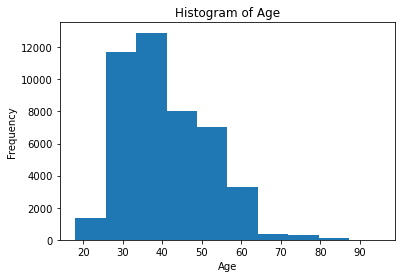

In [30]:
#plot the histogram of age variable.
# you can use atrributes like bins and endge color as well
plt.hist(bank1['age'])  #Another way of doing it, bank1.age.plot.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

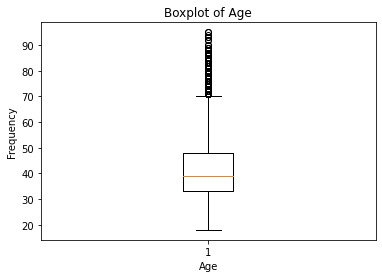

In [31]:
#plot the boxplot of age variable.
plt.boxplot(bank1['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Boxplot of Age')
plt.show()

#### Salary variable 

In [32]:
#describe the salary variable of inp1.
bank1['salary'].describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

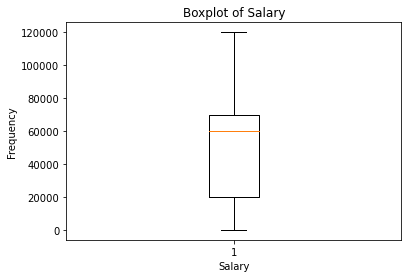

In [33]:
#plot the boxplot of salary variable.
plt.boxplot(bank1['salary'])
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Boxplot of Salary')
plt.show()

#### Balance variable 

In [34]:
#describe the balance variable of inp1.
bank1['balance'].describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

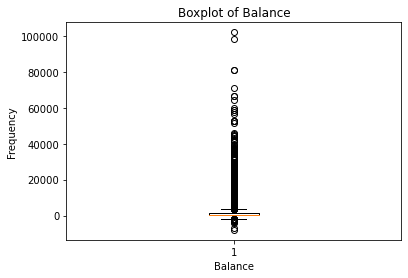

In [35]:
#plot the boxplot of balance variable.
plt.boxplot(bank1['balance'])
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Boxplot of Balance')
plt.show()

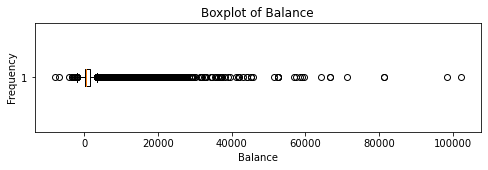

In [37]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=(8,2))
plt.boxplot(bank1['balance'], vert=False)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Boxplot of Balance')
plt.show()

In [38]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
bank1['balance'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [39]:
#describe the duration variable of inp1
bank1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [42]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
# This is a function defined to convert seconds or minutes to single unit. Split splits the prefix 
# and split[0] means the first value i.e.the numerical value of second or minute only!
# def to_min(duration):
#     if 'sec' in duration:
#         min = float(duration.split[0])/60
#     else:
#         min = float(duration.split[0])
#     return min

# # Apply helps in applying the defined function on the data
# bank1['duration'] = bank1['duration'].apply(to_min)

bank1.duration=bank1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [43]:
#describe the duration variable
bank1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of person.
- Marital status of any one.


#### Marital status 

In [44]:
#calculate the percentage of each marital status category. 
msc = bank1['marital'].value_counts()
msp = (msc/len(bank1)*100)
print(msp)

married     60.195744
single      28.294325
divorced    11.509931
Name: marital, dtype: float64


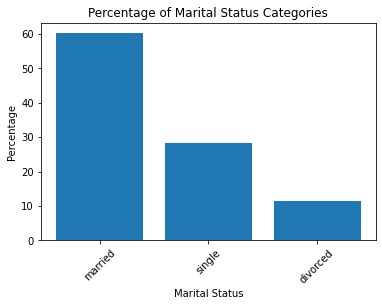

In [45]:
#plot the bar graph of percentage marital status categories
plt.bar(msp.index, msp.values)
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Percentage of Marital Status Categories')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

#### Job  

In [46]:
#calculate the percentage of each job status category.
jsc = bank1['job'].value_counts()
jsp = (jsc/len(bank1)*100)
print(jsp)

blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: job, dtype: float64


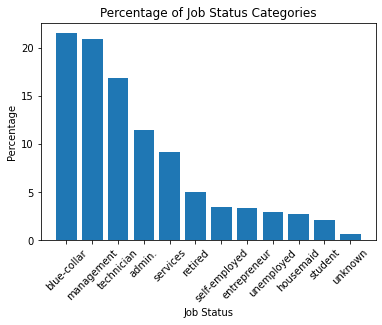

In [47]:
#plot the bar graph of percentage job categories
plt.bar(jsp.index, jsp.values)
plt.xlabel('Job Status')
plt.ylabel('Percentage')
plt.title('Percentage of Job Status Categories')
plt.xticks(rotation=45)
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [48]:
#calculate the percentage of each education category.
ec = bank1['eductation'].value_counts()
ep = (ec/len(bank1)*100)
print(ep)

secondary    51.327473
tertiary     29.419189
primary      15.143597
unknown       4.109741
Name: eductation, dtype: float64


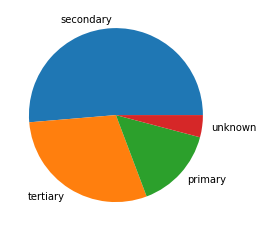

In [49]:
#plot the pie chart of education categories
plt.pie(ec , labels = ec.index)
plt.show()

#### poutcome 

In [50]:
#calculate the percentage of each poutcome category.
poc = bank1['poutcome'].value_counts()
pop = (poc/len(bank1)*100)
print(pop)

unknown    81.751954
failure    10.836784
other       4.072098
success     3.339164
Name: poutcome, dtype: float64


#### Response the target variable 

In [51]:
#calculate the percentage of each response category.
rc = bank1['response'].value_counts()
rp = (rc/len(bank1)*100)
print(rp)

no     88.297425
yes    11.702575
Name: response, dtype: float64


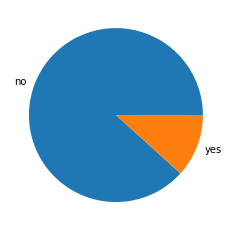

In [52]:
#plot the pie chart of response categories
plt.pie(rc, labels=rc.index)
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

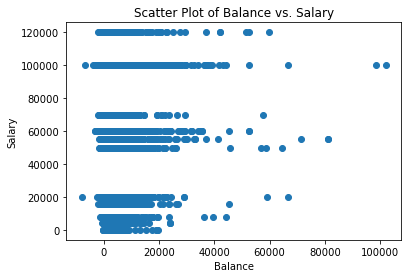

In [53]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(bank1['balance'], bank1['salary'])
plt.xlabel('Balance')
plt.ylabel('Salary')
plt.title('Scatter Plot of Balance vs. Salary')
plt.show()

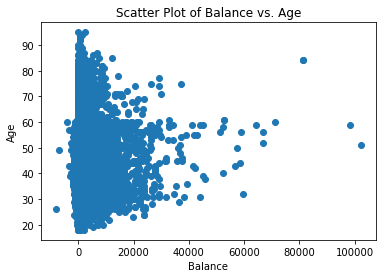

In [54]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(bank1['balance'], bank1['age'])
plt.xlabel('Balance')
plt.ylabel('Age')
plt.title('Scatter Plot of Balance vs. Age')
plt.show()

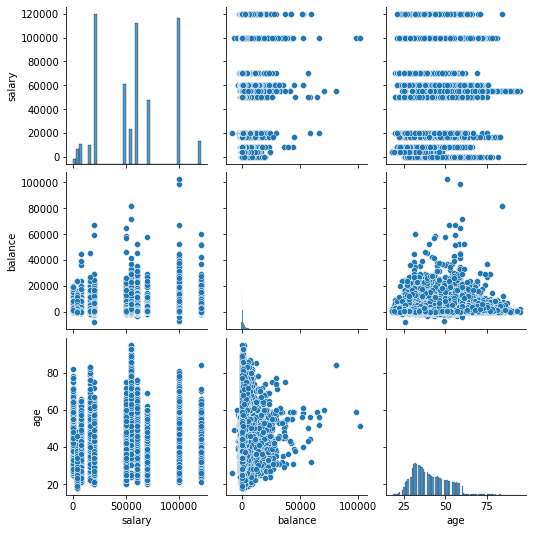

In [55]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
# pair plot is advanced visualization so seabnorn has to be imported
sns.pairplot(bank1[['salary', 'balance', 'age']])
plt.show()

#### Correlation heat map 

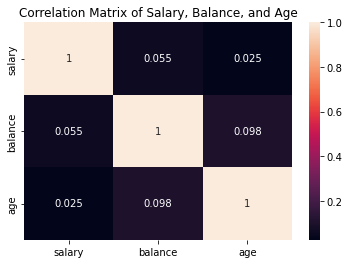

In [56]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
# annot=True shows the values of each cell 
coma = (bank1[['salary', 'balance', 'age']]).corr()
sns.heatmap(coma, annot=True)
plt.title('Correlation Matrix of Salary, Balance, and Age')
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [57]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
mean_sal = bank1.groupby('response')['salary'].mean()
print(mean_sal)

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64


In [58]:
#groupby the response to find the median of the salary with response no & yes seperatly.
median_sal = bank1.groupby('response')['salary'].median()
print(median_sal)

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64


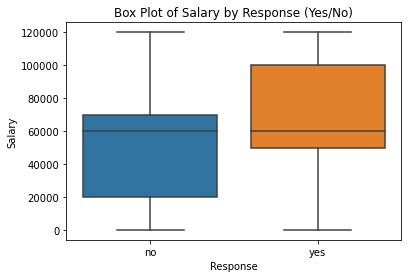

In [59]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(x='response', y='salary', data =bank1)
plt.xlabel('Response')
plt.ylabel('Salary')
plt.title('Box Plot of Salary by Response (Yes/No)')
plt.show()

#### Balance vs response 

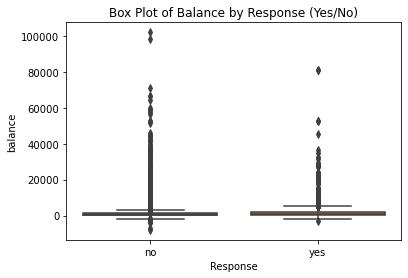

In [60]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(x='response', y='balance', data =bank1)
plt.xlabel('Response')
plt.ylabel('balance')
plt.title('Box Plot of Balance by Response (Yes/No)')
plt.show()

In [61]:
#groupby the response to find the mean of the balance with response no & yes separatly.
mean_bal = bank1.groupby('response')['balance'].mean()
print(mean_bal)

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64


In [62]:
#groupby the response to find the median of the balance with response no & yes separatly.
median_bal = bank1.groupby('response')['balance'].median()
print(median_bal)

response
no     417.0
yes    733.0
Name: balance, dtype: float64


##### 75th percentile 

In [63]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [66]:
#calculate the mean, median and 75th percentile of balance with response
res = bank1.groupby('response')['balance'].agg(['mean', 'median', p75])
print(res)

                 mean  median     p75
response                             
no        1304.292281   417.0  1345.0
yes       1804.681362   733.0  2159.0


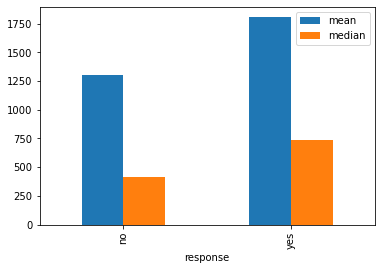

In [67]:
#plot the bar graph of balance's mean and median with response.
bank1.groupby('response')['balance'].agg(['mean', 'median']).plot.bar()
plt.show()

#### Education vs salary 

In [68]:
#groupby the education to find the mean of the salary education category.
mean_sal_e = bank1.groupby('eductation')['salary'].mean()
print(mean_sal_e)

eductation
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64


In [69]:
#groupby the education to find the median of the salary for each education category.
median_sal_e = bank1.groupby('eductation')['salary'].median()
print(median_sal_e)

eductation
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64


#### Job vs salary

In [70]:
#groupby the job to find the mean of the salary for each job category.
mean_sal_j = bank.groupby('job')['salary'].mean()
print(mean_sal_j)

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64


### Segment- 5, Categorical categorical variable 

In [71]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
response = {'yes': 1 , 'no': 0}
bank1['response_flag'] = bank1['response'].replace(response)
print(bank1)

       customerid  age  salary  balance   marital targeted default housing  \
0               1   58  100000     2143   married      yes      no     yes   
1               2   44   60000       29    single      yes      no     yes   
2               3   33  120000        2   married      yes      no     yes   
3               4   47   20000     1506   married       no      no     yes   
4               5   33       0        1    single       no      no      no   
...           ...  ...     ...      ...       ...      ...     ...     ...   
45206       45207   51   60000      825   married      yes      no      no   
45207       45208   71   55000     1729  divorced      yes      no      no   
45208       45209   72   55000     5715   married      yes      no      no   
45209       45210   57   20000      668   married      yes      no      no   
45210       45211   37  120000     2971   married      yes      no      no   

      loan    contact  ...      month   duration  campaign  pda

#### Education vs response rate

In [72]:
#calculate the mean of response_flag with different education categories.
mean_rf = bank1.groupby('eductation')['response_flag'].mean()
print(mean_rf)

eductation
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64


#### Marital vs response rate 

In [73]:
#calculate the mean of response_flag with different marital status categories.
mean_rf_msc = bank1.groupby('marital')['response_flag'].mean()
print(mean_rf_msc)

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64


Text(0.5, 1.0, 'Average Response Flag by Marital Status')

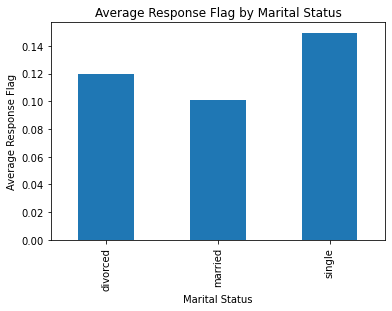

In [76]:
#plot the bar graph of marital status with average value of response_flag
(bank1.groupby('marital')['response_flag'].mean()).plot.bar()
plt.xlabel('Marital Status')
plt.ylabel('Average Response Flag')
plt.title('Average Response Flag by Marital Status')
# plt.show() its optional!

#### Loans vs response rate 

<AxesSubplot:xlabel='loan'>

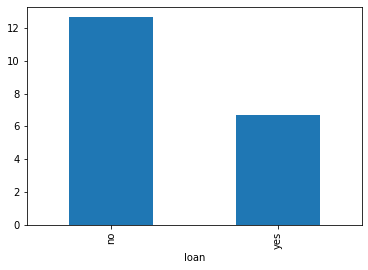

In [78]:
#plot the bar graph of personal loan status with average value of response_flag
(bank1.groupby('loan')['response_flag'].mean()*100).plot.bar()

#### Housing loans vs response rate 

<AxesSubplot:xlabel='housing'>

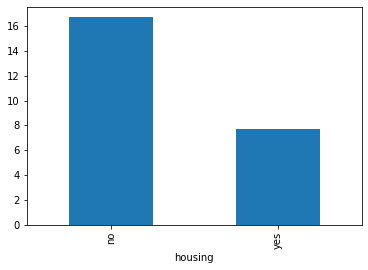

In [79]:
#plot the bar graph of housing loan status with average value of response_flag
(bank1.groupby("housing")["response_flag"].mean()*100).plot.bar()

#### Age vs response 

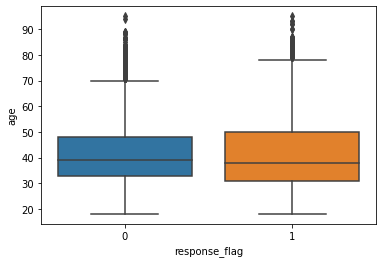

In [82]:
#plot the boxplot of age with response_flag
sns.boxplot(data=bank1, y='age', x='response_flag')
plt.show()

##### making buckets from age columns 

In [84]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
bank1["age_group"]= pd.cut(bank1.age,[0,30,40,50,60,120],labels=["<30", "30-40", "40-50","50-60","60+"])

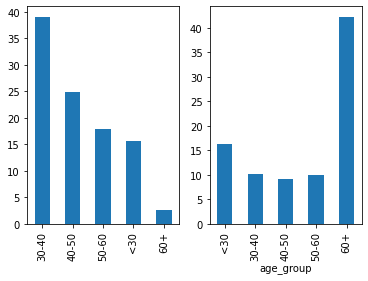

In [85]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
# plt.figure(figsize=[10,4]) Optional
# When normalize=True: The value_counts() function counts the occurrences of each unique value and divides the count of 
# each value by the total count of all values, which effectively calculates the proportion or percentage of each unique value.
plt.subplot(1,2,1)
(bank1.age_group.value_counts(normalize=True)*100).plot.bar()
plt.subplot(1,2,2)
(bank1.groupby(['age_group'])['response_flag'].mean()*100).plot.bar()
plt.show()

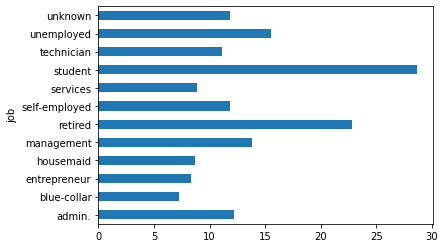

In [86]:
#plot the bar graph of job categories with response_flag mean value.
(bank1.groupby(['job'])['response_flag'].mean()*100).plot.barh()
plt.show()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

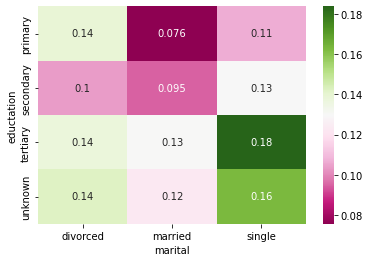

In [88]:
#create heat map of education vs marital vs response_flag
ax=pd.pivot_table(data=bank1,index="eductation",columns='marital',values='response_flag')
sns.heatmap(ax,annot=True,cmap='PiYG')
plt.show()

#### Job vs marital vs response 

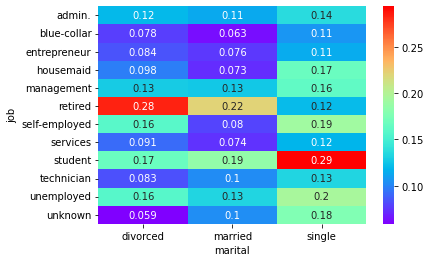

In [89]:
#create the heat map of Job vs marital vs response_flag.
ax=pd.pivot_table(data=bank1,index='job',columns='marital',values='response_flag')
sns.heatmap(ax,annot=True,cmap='rainbow')
plt.show()

#### Education vs poutcome vs response

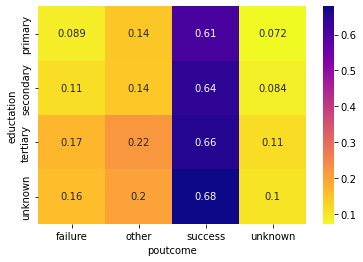

In [91]:
#create the heat map of education vs poutcome vs response_flag.
ax=pd.pivot_table(data=bank1,index='eductation',columns='poutcome',values='response_flag')
sns.heatmap(ax,annot=True,cmap='plasma_r')
plt.show()